# Data Sourcing

In this notebook, various data sourcing is put together, described and prepared. At first, the precide modelling data is investigated and the potential data sources are investigated.

In [1]:
import pandas as pd
import numpy as np

## What do we have?

In [2]:
filename = 'data/data_dups_removed.csv'
source = pd.read_csv(filename, index_col = 0)

The main modelling data that is found id the the so-called 'SMILES' data: https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system

In [3]:
source['SMILES'].head()

0    C[n+]1c2cc(N)ccc2cc2ccc(N)cc21.Nc1ccc2cc3ccc(N...
1    O=C([O-])c1ccccc1-c1c2cc(Br)c(=O)c(Br)c-2oc2c(...
2    CO[C@H]1CC(O[C@H]2C[C@H]([C@H]3O[C@](C)(O)[C@H...
3    CN(C)c1ccc(C(=C2C=CC(=[N+](C)C)C=C2)c2ccccc2)c...
4    CC(=O)O.CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(=...
Name: SMILES, dtype: object

We also have molecular weight (which is out only quantitative molecular descriptor):

In [4]:
source['FW'].head()

0     468.9806
1     691.8542
2     934.1584
3     927.0048
4    1342.5025
Name: FW, dtype: float64

## What are our data engineering options?

There are two natural areas of data engineering that will be investigated:

1. The SMILES data are strings, thus employing the use of tools from NLP would be useful, in particular we can use bag of wards (BOW) and vectorise the inputs for the use on sequential models (like RNN's).

2. Employ damain molecular knowledge to investigate molecular representations of the smiles data : This would involve the use of pythonic libraries which specifically try to do this.

Both directions are investigate here in the following ways:

1. The basic technique is explained (particularly using code written in #INSERT SCRIPT NAME#.
2. A pointer to the relevant part of the script is shown.

## Bag of words

The bag of words technique, is the simple count the number of unique tokens in the sentence/word/document. In our case, the smile is a word and the components that are counted are the characters that make it up.

In [5]:
import drugdiscovery.preprocessing as pp

In [6]:
data = source.copy()
smiles = data['SMILES'].values

In [7]:
bow = pp.BagOfWords(smiles[:5])
bow_mat = bow.fit()
bow_transform  = bow.transform(smiles[5:10])

In [8]:
bow_mat

array([[ 3.,  0.,  0.,  0., 26.,  2.,  0.,  1.,  1.,  0.,  0.,  6.,  2.,
         4.,  3.,  2.,  0.,  0.,  2.,  0.,  1.,  2.,  2.,  0.,  4.,  0.],
       [ 7.,  0.,  1.,  0., 19.,  4.,  4.,  4.,  2.,  4.,  2.,  4.,  4.,
         2.,  7.,  0.,  0.,  0.,  2.,  4.,  0.,  1.,  0.,  2.,  4.,  0.],
       [19., 19.,  0.,  2.,  0., 25.,  0.,  1.,  1.,  0.,  1.,  4., 25.,
         1., 19.,  4., 31.,  3.,  1., 17.,  0., 47.,  0.,  0.,  2.,  0.],
       [16.,  0.,  0.,  0., 24.,  4.,  0.,  2.,  2.,  0., 14.,  8.,  4.,
         4., 16.,  0.,  0.,  0.,  4., 12.,  0., 28.,  0.,  0.,  4.,  0.],
       [21., 12.,  0.,  0., 25., 12.,  0.,  0.,  0.,  0., 12.,  4., 12.,
        13., 21.,  0., 12.,  0.,  1., 14.,  0., 41.,  4.,  0., 12.,  0.]])

In [9]:
bow_transform

array([[ 4.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  4.,  0.,  0.,  0.,  0.,  1.,  0., 14.,  0.,  0.,  2.,  1.],
       [ 2.,  1.,  0.,  0.,  6.,  3.,  0.,  1.,  1.,  0.,  1.,  2.,  3.,
         1.,  2.,  0.,  0.,  0.,  0.,  3.,  0.,  1.,  0.,  0.,  2.,  1.],
       [ 4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,
         2.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  4.],
       [ 3.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,
         2.,  3.,  0.,  0.,  0.,  1.,  1.,  1., 16.,  0.,  0.,  2.,  0.],
       [ 5.,  2.,  0.,  0., 13.,  3.,  0.,  0.,  0.,  0.,  1.,  4.,  3.,
         1.,  5.,  2.,  3.,  0.,  2.,  3.,  2., 18.,  2.,  0.,  2.,  1.]])

In [10]:
# the symbols that the BOW model has fit for is as follows:

In [11]:
pd.DataFrame([bow.sym_idx])

,(,H,o,5,c,[,r,-,+,B,...,@,4,.,O,l,C,n,a,1,_unk_
0,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25


## Vector/Token representation

The vector representation provides a vectoral representation that maintains the sequeunces of the tokens (in this case atoms).

In [12]:
vr = pp.VectorRepresentation(smiles[:5])
vr_mat = vr.fit()
vr_transform  = vr.transform(smiles)

In [13]:
vr_mat.shape

(5, 222)

In [14]:
vr_transform

array([[21,  5, 22, ..., 26, 26, 26],
       [19, 10, 21, ..., 26, 26, 26],
       [21, 19,  5, ..., 17,  8, 12],
       ...,
       [25, 10, 21, ..., 26, 26, 26],
       [25, 10, 21, ..., 26, 26, 26],
       [21, 21, 21, ..., 26, 26, 26]])

## Morgan Fingerprint representation

In general a fingerprint is when a 'large' amount of data is compressed into a bit representation. This is done using a mapping between molecules and the bit representation. The map in of itself provides hashings of structural information about the molecule. Some details can be found in https://towardsdatascience.com/a-practical-introduction-to-the-use-of-molecular-fingerprints-in-drug-discovery-7f15021be2b1. Luckily, there is the RdChem library which adequetly offers a simple way to obtain these fingerprints. Code has been written to wrap around this call. Note, that unlike the previous representation there is not real notion of 'fitting' since the mappings are based on the smile itself as opposed to the data seen before. However, the call to perform that transformation is labelled 'transform' as opposed to 'fit' to distinguish this difference.

In [15]:
mfp = pp.MorganFingerprints(smiles[:5])
mfp_mat = mfp.transform()

In [16]:
mfp_mat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [17]:
mfp_mat.shape

(5, 2048)

## Murcko Scaffolds

The murcko scaffolds are a way to reduce a complicated molecule to some core part of the molecure. According to the explanation provided in https://datagrok.ai/help/domains/chem/functions/murcko-scaffolds. This is common in medicinal chemistry and offers first basis for a systematic study for the a set of molecules. 

As with the fingerprint mapping, this is a mapping that can be applied from a smile to another smile.

In [18]:
ms = pp.MurckoScaffold(smiles[:5])
ms_smiles = ms.transform()

The rdchem library can be used to show what the scaffold of the molecules look like.

In [19]:
from rdkit import Chem

mol_list = []
for i in range(0,2):
    mol_list.append(Chem.MolFromSmiles(smiles[i]))
    mol_list.append(Chem.MolFromSmiles(ms_smiles[i]))

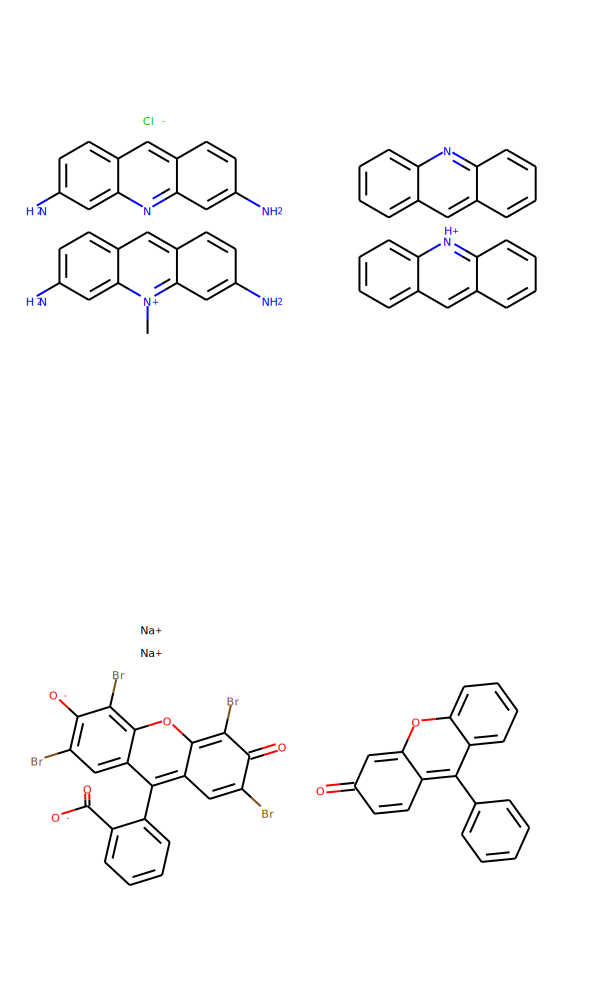

In [20]:
from rdkit.Chem import Draw
img = Draw.MolsToGridImage(mol_list, molsPerRow=2, subImgSize=(300, 500), maxMols=10,
                           legends=None, useSVG=True)
img

The plan would then be apply the BOW and vector/token representation to these scaffolds.

## Conclusion

In this notebook, various data engineering options have been investigated, both from a pure machine learning point of view (which follows from methods familiar to NLP), and those purely within the chemitry context. The following data engineering areas will be investigated in this project.

1. Bag of words
2. Vector/Token representation
3. Morgan Fingerprint
4. Murcko Scaffolds (so that BOW and vector representations can be applied)

The script ##### will generate the morgan fingerprint and murcko scaffolds, but not the BOW of tokenised words. The reason is that the chemistry transformation are smile by smile and are a simple transformation whereas the data transformation must first be fit on training data and transforms the unseen hold out set.